In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
result_df = pd.read_csv('img_size.csv')
classes = result_df['class'].unique()
img_sizes = list(map(str, result_df['size'].unique()))

In [3]:
# Scoring formular
amh_weights = np.array([1, -1, -1]).reshape((3, 1))
result_df['score'] = np.dot(result_df.iloc[:, 2:], amh_weights)

In [4]:
# Get scores for each class per image size (7 sizes)
class_score_per_img_size = {}
for i in range(len(classes)):
    score_list = []
    for j in range(7):
        score_list.append(result_df['score'].iloc[i + j * 22])
    class_score_per_img_size[classes[i]] = score_list

In [32]:
iterator = 0

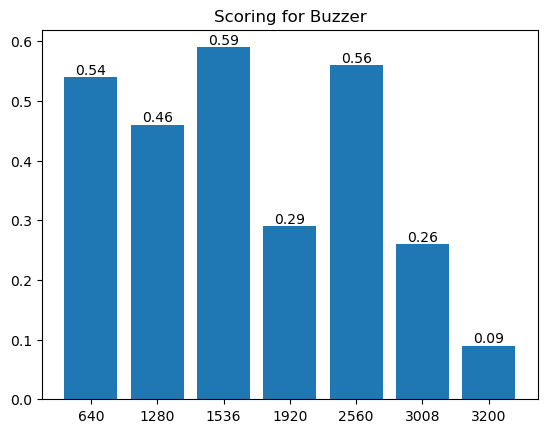

In [35]:
# Plot the scores
%matplotlib inline
value_bars = plt.bar(img_sizes, height=class_score_per_img_size[classes[iterator]])
title = 'Scoring for ' + classes[iterator]
plt.title(title)
plt.bar_label(value_bars, fmt='%.2f')
plt.show()

iterator +=1

In [7]:
# Calculate scoring for each image sizes
img_size_scores = []
for i in range(len(img_sizes)):
    total_score = 0
    for j in range(len(classes)):
        total_score += class_score_per_img_size.get(classes[j])[i]
    
    img_size_scores.append(total_score)

print(img_size_scores)

[13.6, 9.76, 6.8100000000000005, 2.3199999999999994, -2.5, -7.29, -8.37]


In [8]:
# Find the best results among the image sizes.
index_list = []
for i in range(len(classes)):
    index = np.argmax(class_score_per_img_size.get(classes[i]))
    index_list.append(index)
    
unique_img_size_index = np.unique(index_list)
unique_img_size_index

array([0, 1, 2, 3, 4], dtype=int64)

In [9]:
# Generate all possilbe 3-element set from the image size index list above.
from itertools import combinations

index_subset = combinations(unique_img_size_index, 3)
score_list = {}

# Find the best scoring for each set of image sizes.
for i in index_subset:
    total_score = 0
    for j in range(len(classes)):
        max_score = -1000
        for k in range(3):
            if class_score_per_img_size.get(classes[j])[i[k]] > max_score:
                max_score = class_score_per_img_size.get(classes[j])[i[k]]
        total_score += max_score
    score_list[i] = total_score

score_list

{(0, 1, 2): 14.110000000000001,
 (0, 1, 3): 13.93,
 (0, 1, 4): 13.91,
 (0, 2, 3): 14.16,
 (0, 2, 4): 14.13,
 (0, 3, 4): 13.819999999999999,
 (1, 2, 3): 10.479999999999999,
 (1, 2, 4): 10.4,
 (1, 3, 4): 10.199999999999998,
 (2, 3, 4): 7.120000000000001}

In [10]:
# Choose the best image size for each class based on the image size subset and scores.
subset = (0, 2, 4)
chosen_img_size = {}
for i in range(len(classes)):
    list_of_scores = [class_score_per_img_size.get(classes[i])[j] for j in subset]
    index_from_argmax = np.argmax(list_of_scores)
    chosen_img_size[classes[i]] = img_sizes[subset[index_from_argmax]]
    
print(chosen_img_size)

{'Breadboard': '640', 'Button': '640', 'Buzzer': '1536', 'Infared_Sensor': '640', 'Keypad': '640', 'LCD': '640', 'LED': '1536', 'LED_Matrix': '640', 'Number_LED': '640', 'Photoresistor': '640', 'Potentiometer': '640', 'Remote': '640', 'Resistor': '2560', 'Rheostat': '640', 'Servo_Engine': '1536', 'Thermistor': '1536', 'Tool_Box': '640', 'Tool_Box_Tray': '640', 'UNO_R3': '640', 'USB_Cable': '640', 'Ultrasonic_Sensor': '640', 'Wire': '640'}


In [137]:
chosen_img_size_meta = [img_sizes[i] for i in subset]
chosen_img_size_df = pd.DataFrame.from_dict(chosen_img_size, orient='index')
chosen_img_size_df.to_csv('Assigned_to_{0}.csv'.format(chosen_img_size_meta))